In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/cars.csv')
data.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [3]:
data.shape

(261, 8)

In [4]:
data = data.sample(frac=1)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 79 to 233
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           261 non-null    float64
 1    cylinders    261 non-null    int64  
 2    cubicinches  261 non-null    object 
 3    hp           261 non-null    int64  
 4    weightlbs    261 non-null    object 
 5    time-to-60   261 non-null    int64  
 6    year         261 non-null    int64  
 7    brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 18.4+ KB


In [6]:
data.columns = data.columns.str.lstrip()

In [7]:
data.columns

Index(['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60',
       'year', 'brand'],
      dtype='object')

In [8]:
data['cubicinches'] = pd.to_numeric(data['cubicinches'], errors="coerce")
data['weightlbs'] = pd.to_numeric(data['weightlbs'], errors="coerce")

In [9]:
data.dropna(inplace=True)

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['brand'] = label_encoder.fit_transform(data['brand'].astype('str'))
data.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
79,32.4,4,108.0,75,2350.0,17,1982,1
6,13.0,8,351.0,158,4363.0,13,1974,2
145,23.0,4,120.0,88,2957.0,17,1976,0
80,15.5,8,400.0,190,4325.0,12,1978,2
239,23.0,4,122.0,86,2220.0,14,1972,2


In [11]:
data_x = pd.DataFrame(data, columns=['mpg', 'cylinders', 'cubicinches', 'hp'])
label_y = data['brand']

Text(0, 0.5, 'Weight')

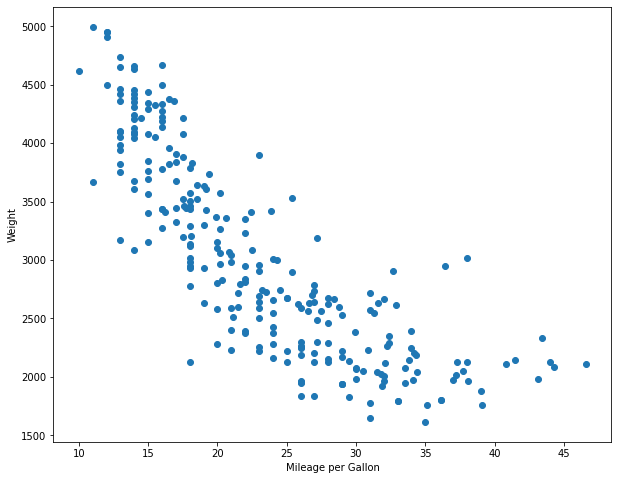

In [12]:
plt.figure(figsize=(10,8))
plt.scatter(data['mpg'], data['weightlbs'])
plt.xlabel("Mileage per Gallon")
plt.ylabel("Weight")

In [13]:
from sklearn.cluster import KMeans

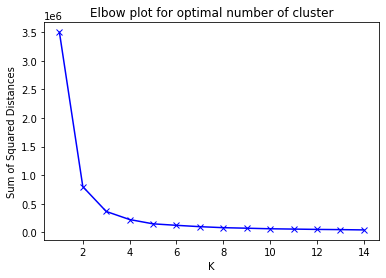

In [14]:
sum_of_squared_distances = []
K = range(1,15)

for k in K:
  k_means = KMeans(n_clusters=k)
  k_means = k_means.fit(data_x)

  sum_of_squared_distances.append(k_means.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel("K")
plt.ylabel("Sum of Squared Distances")

plt.title("Elbow plot for optimal number of cluster")
plt.show()

In [15]:
k_means = KMeans(n_clusters=3)
k_means = k_means.fit(data_x)

In [16]:
from sklearn.metrics import silhouette_score
score = silhouette_score(data_x, k_means.labels_)
print("Score : ", score)

Score :  0.6323149311159748


In [17]:
from sklearn.metrics import homogeneity_score
score = homogeneity_score(label_y, k_means.labels_)
print("Score : ", score)

Score :  0.31550036277564175


In [18]:
from sklearn.metrics import v_measure_score
score = v_measure_score(label_y, k_means.labels_)
print("Score : ", score)

Score :  0.3003375614022765


In [19]:
from sklearn.metrics import completeness_score
score = completeness_score(label_y, k_means.labels_)
print("Score : ", score)

Score :  0.28656536273532296


In [20]:
from sklearn.metrics import adjusted_rand_score
score = adjusted_rand_score(label_y, k_means.labels_)
print("Score : ", score)

Score :  0.11281925794858022


In [21]:
from sklearn.metrics import adjusted_mutual_info_score
score = adjusted_mutual_info_score(label_y, k_means.labels_)
print("Score : ", score)

Score :  0.29459818425329576
